# Python pour le Machine Learning SKLEARN: Apprentissage non suppervisé


## 1. Intro

Je vais vous présenter les bases de l'apprentissage non supervisé, la deuxième branche très connue du machine learning et du deep learning. Nous allons explorer les trois applications les plus importantes : 
- le cloud storage, 
- la détection d'anomalies, et 
- la réduction de dimension. 

![Python_Seaborn_Fig_000164.png](./images/Python_Seaborn_Fig_000164.png)

## 2. Apprentissage Non-Supervisé

Bon, avant toute chose, qu'est-ce que l'apprentissage non supervisé ? Eh bien, c'est une méthode d'apprentissage où, au lieu de montrer à la machine des exemples x/y de ce qu'elle doit apprendre, on lui fournit uniquement des données fixes et on lui demande d'analyser la structure de ces données pour apprendre elle-même à réaliser certaines tâches. 
![Python_Seaborn_Fig_000166.png](./images/Python_Seaborn_Fig_000166.png)

Par exemple, 
1. la machine peut apprendre à classer des données en les regroupant uniquement selon leur ressemblance. C'est ce qu'on appelle faire du clustering ou, en français, de la classification non supervisée. Avec cette technique, on peut faire énormément de choses, comme classer des documents, des photos, classer des tweets, segmenter la clientèle d'une entreprise. On verra comment faire cela avec l'algorithme K-means clustering.
![Python_Seaborn_Fig_000166.png](./images/Python_Seaborn_Fig_000167.png)

2. Une autre tâche que la machine peut réaliser grâce à l'apprentissage non supervisé est la détection d'anomalies. La machine analyse la structure de nos données et parvient à trouver les échantillons dont les caractéristiques sont très éloignées de celles des autres échantillons. Et cela nous permet de développer des systèmes de sécurité, de détection de fraude bancaire, de détection de défaillances dans une usine. Je vais vous montrer comment développer de tels systèmes avec l'algorithme Isolation Forest. 
![Python_Seaborn_Fig_000166.png](./images/Python_Seaborn_Fig_000168.png)

3. Pour finir, une troisième application très populaire de l'apprentissage non supervisé est la réduction de dimensionnalité. En analysant la structure de nos données, la machine est capable d'apprendre comment simplifier cette structure tout en conservant les principales informations. Pour vous donner un exemple, c'est comme si la machine étudiait la structure d'un dessin et apprenait à le redessiner de façon plus simple tout en conservant les éléments principaux. D'un point de vue mathématique, la machine apprend en fait à projeter nos données dans des espaces de dimensions réduites. L'un des algorithmes qui permet de faire cela est l'Analyse en Composantes Principales, ou PCA pour les intimes. Et je dois bien vous dire que les applications de cet algorithme sont absolument géniales. On peut non seulement simplifier la complexité superflue qu'un dataset pourrait avoir, ce qui facilite grandement l'apprentissage de la machine pour des problèmes de régression ou de classification, mais on peut également visualiser en deux ou trois dimensions des espaces qui vont bien au-delà de notre imagination. 
![Python_Seaborn_Fig_000166.png](./images/Python_Seaborn_Fig_000169.png)

Bref, voyons comment fonctionnent tous ces algorithmes et comment les mettre en place avec scikit-learn

## 3. K-Means Clustering

Nous allons commencer par parler du clustering. Comme nous l'avons vu, le principe est de laisser la machine apprendre à classer nos données selon leur ressemblance. Pour cela, l'un des algorithmes les plus populaires est le K-Means clustering. 

Examinons son fonctionnement.

Imaginez que nous souhaitons regrouper les données suivantes en trois clusters.
![Python_Seaborn_Fig_000171.png](./images/Python_Seaborn_Fig_000171.png)

Pour cela, nous allons d'abord placer trois points appelés "centroïdes" au hasard parmi nos données. 
![Python_Seaborn_Fig_000171.png](./images/Python_Seaborn_Fig_000172.png)

Ensuite, nous affectons chaque point du dataset au centroïde le plus proche, ce qui nous donne trois clusters.
![Python_Seaborn_Fig_000171.png](./images/Python_Seaborn_Fig_000173.png)

Après cela, nous déplaçons chaque centroïde au centre de son cluster. 
![Python_Seaborn_Fig_000171.png](./images/Python_Seaborn_Fig_000175.png)

Ensuite, nous recommençons : nous affectons chaque point de notre dataset au centroïde le plus proche, 
![Python_Seaborn_Fig_000171.png](./images/Python_Seaborn_Fig_000177.png)

puis nous déplaçons chaque centroïde au centre de son cluster. 
![Python_Seaborn_Fig_000171.png](./images/Python_Seaborn_Fig_000178.png)

Nous continuons cette procédure jusqu'à ce que les centroïdes convergent vers une position d'équilibre.
![Python_Seaborn_Fig_000171.png](./images/Python_Seaborn_Fig_000179.png)

Donc, vous l'aurez compris, l'algorithme du K-Means clustering est en réalité un algorithme itératif qui fonctionne en deux étapes. 

1. Première étape : on affecte les points du dataset au centroïde le plus proche. 
2. Deuxième étape : on calcule la moyenne de chaque cluster et on y déplace le centroïde. 

C'est aussi simple que cela. 

Cependant, selon la position initiale de nos centroïdes, 
![Python_Seaborn_Fig_000171.png](./images/Python_Seaborn_Fig_000180.png)

il est possible qu'ils convergent vers une mauvaise position. Par exemple, comme ceci. 
![Python_Seaborn_Fig_000171.png](./images/Python_Seaborn_Fig_000181.png)

Heureusement, il existe une solution pour éviter cela. 

Cette solution consiste tout simplement à exécuter l'algorithme du K-Means clustering plusieurs fois d'affilée en modifiant à chaque fois la position initiale de nos centroïdes. Pour chaque résultat obtenu, on mesure la distance entre les points d'un cluster et le centre de ce dernier, et on retient la solution pour laquelle la somme de ces distances est la plus petite.
![Python_Seaborn_Fig_000171.png](./images/Python_Seaborn_Fig_000182.png)

En résumé, l'algorithme du K-Means clustering cherche en réalité à minimiser une fonction coût appelée "inertia", qui représente la distance entre les points d'un cluster et le centre de ce dernier. 
![Python_Seaborn_Fig_000171.png](./images/Python_Seaborn_Fig_000183.png)

Cela correspond à peu près à la variance de nos clusters. 

Donc, l'algorithme du K-Means clustering cherche effectivement à minimiser la variance des clusters, ce qui nous convient parfaitement car cela élimine les solutions dans lesquelles nous avons des centroïdes qui se déplacent au milieu de deux groupes de données, si vous voyez ce que je veux dire.

## 4. K-Means Sklearn

Pour réaliser cela avec scikit-learn, il faut commencer par importer l'estimateur KMeans depuis le module cluster. 

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
from sklearn.cluster import KMeans

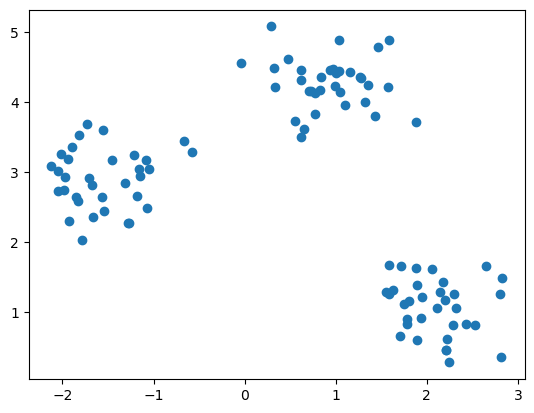

In [3]:
# Génération de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

Ensuite, on crée un modèle dans lequel on précise le nombre de clusters que l'on souhaite avoir, par exemple 3. 

On peut également définir le nombre d'initialisations que l'on souhaite pour notre algorithme. C'est d'ailleurs le nombre de fois que l'algorithme devrait s'exécuter. De base, ce nombre est fixé à 10 et vous n'avez pas vraiment besoin d'y toucher. 

Vous pouvez également définir le nombre d'itérations max avec max_iter. Par défaut, il est fixé à quelque chose comme 200 ou 300. Là encore, il n'est généralement pas utile d'y toucher. 

Enfin, un dernier paramètre intéressant est init qui détermine la stratégie d'initialisation que nous allons utiliser pour notre algorithme. Par défaut, c'est la méthode "k-means++" qui est utilisée. Cette technique consiste à placer nos centroïdes sur des points très éloignés de notre dataset, dans le but d'accélérer la convergence de nos centroïdes vers des positions d'équilibre. 
![Python_Seaborn_Fig_000184.png](./images/Python_Seaborn_Fig_000184.png)

C'est une excellente méthode d'initialisation et je vous conseille de ne pas y toucher. 

En fait, lors de l'utilisation du modèle KMeans, tout ce que vous avez à faire est de définir n_clusters et de choisir un nombre de clusters. 

In [4]:
model = KMeans(n_clusters=3, n_init=10)

Ensuite, on utilise les méthodes habituelles, comme fit pour entraîner notre modèle. On va l'entraîner avec les données x présentes. 

In [5]:
model.fit(X)

KMeans(n_clusters=3, n_init=10)

Une fois que notre algorithme est entraîné, on peut voir comment nos différents échantillons sont classés avec l'attribut labels_ 

In [6]:
model.labels_

array([2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0])

ou en utilisant la méthode predict(x), comme on le ferait avec un transformateur classique. 

In [7]:
model.predict(X, y)

array([2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0])

Pour visualiser comment nos données sont classées, on peut utiliser Matplotlib, pour le paramètre de couleur, on écrit c = modele.predict(x). 

Cela nous donne le résultat suivant. 

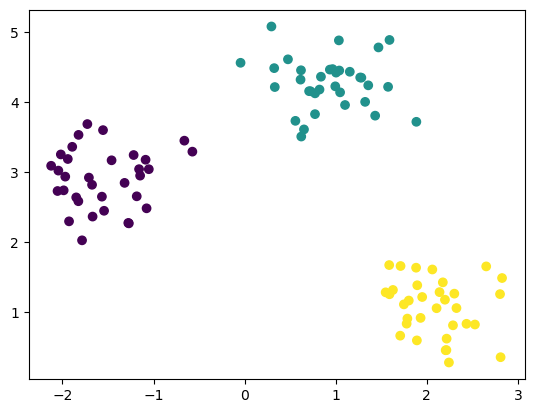

In [8]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))

Pour compléter cela, on peut aussi afficher la position finale de nos centroïdes. Pour cela, il suffit d'écrire modele.cluster_centers_. On obtient alors un tableau de trois lignes et deux colonnes, car nous avons trois centroïdes et deux variables. 

In [9]:
model.cluster_centers_

array([[-1.55022199,  2.90542155],
       [ 0.92702654,  4.27385438],
       [ 2.08889087,  1.07930405]])

Ainsi, nous avons les coordonnées du premier centroïde, celles du deuxième, et ainsi de suite. 

Si nous voulions afficher cela avec Matplotlib, nous utiliserions [0,:] pour obtenir toutes les coordonnées x des centroïdes et [1,:] pour les coordonnées y. En spécifiant la couleur rouge avec c='r', on obtiendra la position finale de nos centroïdes sur le graphique. 

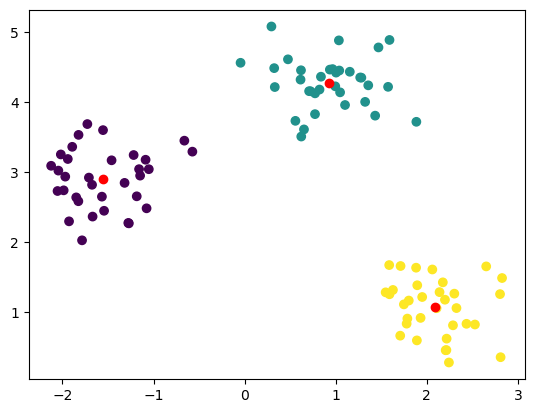

In [10]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter( model.cluster_centers_[:,0],model.cluster_centers_[:,1], c='r')

Grâce à ces centroïdes, nous pourrons faire de futures prédictions. Si, par exemple, nous recevons un nouvel échantillon dans nos données, nous calculerons simplement sa distance par rapport aux trois centroïdes. La distance la plus courte déterminera le cluster auquel il appartient. 

En parlant de distance, nous pouvons aussi calculer l'inertie, c'est-à-dire la fonction coût de notre modèle, avec modele.inertia_. Cette fonction nous donne la somme des distances entre les points d'un cluster et son centroïde. Cette valeur dépendra des unités utilisées dans votre dataset, que ce soit en euros, en centimètres ou autre. 

In [11]:
model.inertia_

30.87053128014066

Il est également possible d'utiliser la méthode score qui nous donnera cette même valeur mais exprimée de façon négative. 

In [12]:
model.score(X)

-30.870531280140664

Le clustering est très intéressant, et une autre chose à noter est que KMeans peut être utilisé comme transformateur grâce à la méthode fit_transform. Cette méthode retourne la distance entre chaque point d'un cluster et son centroïde.

## 4. K-Means – Elbow Method

Une dernière petite chose : comment être sûr de choisir le bon nombre de clusters pour notre algorithme ? 

Alors, dans notre cas, c'était assez facile. On pouvait regarder notre dataset et observer trois groupes distincts, d'où la déduction qu'il fallait trois clusters. Simple.
![Python_Seaborn_Fig_000185.png](./images/Python_Seaborn_Fig_000185.png)

Mais que faire lorsqu'on a affaire à un dataset ayant des centaines de dimensions où nos données sont peut-être mélangées ? 
![Python_Seaborn_Fig_000185.png](./images/Python_Seaborn_Fig_000186.png)

Il existe une technique appelée "méthode du coude" qui consiste à tracer l'évolution du coût de notre modèle en fonction du nombre de clusters et de détecter sur ce graphique une zone de coude. 
![Python_Seaborn_Fig_000185.png](./images/Python_Seaborn_Fig_000187.png)

Cette zone indique le nombre optimal de clusters, c'est-à-dire celui qui nous permet de minimiser au maximum le coût de notre modèle tout en conservant un nombre raisonnable de clusters. Car évidemment, si le but est simplement de minimiser la fonction de coût, il suffirait de créer autant de clusters que de points dans notre dataset, réduisant le coût à zéro. 

Pour faire cela avec scikit-learn, c'est simple. On commence par créer une liste vide, qui contiendra les coûts de nos différents modèles pour des valeurs de k allant, par exemple, de 1 à 20. 

In [13]:
inertia = []

Ensuite, on définit une gamme de valeurs à tester (de 1 à 20) et on crée une boucle. 

Dans cette boucle, on entraîne un modèle KMeans avec un nombre de clusters k. 

Une fois le modèle entraîné, on calcule son coût et on l'ajoute à notre liste. 

In [14]:
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k, n_init=10).fit(X)
    inertia.append(model.inertia_)    

Enfin, on trace un graphique pour observer la courbe et identifier la zone de coude. 

Text(0, 0.5, 'Cout du modele (Inertia)')

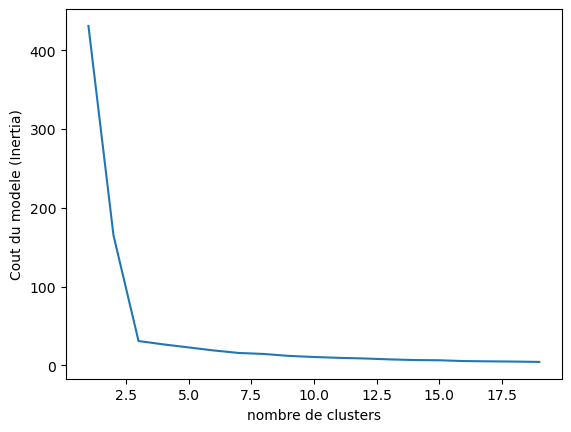

In [15]:
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

Ici, la zone de coude est à 3 clusters, ce qui est cohérent car il y a réellement trois groupes distincts. 

Avec cette information, vous pouvez désormais effectuer du clustering avec scikit-learn. 

Il y a bien d'autres algorithmes que KMeans. Si je devais en recommander quelques-uns, ce seraient DBSCAN et le clustering agglomératif. 

![Python_Seaborn_Fig_000188.png](./images/Python_Seaborn_Fig_000188.png)

Ils sont particulièrement utiles lorsque vous souhaitez segmenter des données formant des clusters non convexes ou anisotropes. Sur de tels exemples, ces méthodes fourniraient de meilleurs résultats que KMeans. 
![Python_Seaborn_Fig_000188.png](./images/Python_Seaborn_Fig_000189.png)

Cependant, ce type de situation est assez rare car, généralement, les données sont réparties de façon normale. 
KMeans est donc plus efficace et rapide. Je le recommande pour classer des photos, des documents, des tweets, segmenter des entreprises, trier des produits alimentaires, etc. 

Maintenant, parlons d'un autre domaine majeur de l'apprentissage non supervisé : la détection d'anomalies.

## 5. Détection d'Anomalies (Isolation Forest)

La détection d'anomalies est une technique d'apprentissage non supervisée. Elle vise à identifier, dans notre dataset, les échantillons dont les caractéristiques (x) diffèrent sensiblement de celles des autres échantillons. 

Pour ce faire, on peut par exemple calculer la moyenne et l'écart type de nos données afin de déterminer une fonction de densité de probabilités. 

Nous utilisons ensuite cette fonction pour évaluer la probabilité d'existence d'un échantillon donné. 

![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000190.png)

Lorsque cette probabilité est inférieure à un certain seuil, l'échantillon est considéré comme anormal.

![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000192.png)

Cette technique est efficace. Cependant, je vais vous présenter une méthode plus récente et plus performante : l'algorithme Isolation Forest. Le principe est le suivant : dans notre dataset, nous réalisons une série de divisions aléatoires et comptons le nombre de ces divisions nécessaires pour isoler un échantillon. Plus ce nombre est faible, plus il est probable que l'échantillon soit une anomalie.

![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000193.png)

Prenons un dataset comme exemple. Imaginons que nous effectuions une première division aléatoire en choisissant une variable, disons x1, et en traçant une ligne orthogonale à cette variable. 
![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000194.png)

Si cette ligne n'isole aucun échantillon, 
![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000195.png)

nous continuons en choisissant une autre variable, peut-être x2, et en traçant à nouveau une ligne orthogonale.
![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000196.png)

Si nous parvenons enfin à isoler un échantillon, c'est probablement l'échantillon qui nous intéresse.
![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000197.png)

Est-ce de la chance, en fin de compte ? Pour isoler cet échantillon, il suffit de tracer un trait dans toute cette région, c'est-à-dire qu'il y a plus d'une chance sur deux d'isoler cet échantillon lorsqu'on réalise un split sur x1. 
![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000198.png)

A contrario, si on voulait isoler un des échantillons qui est perdu dans cette masse de données, il faudrait, au minimum, placer deux traits qui soient chacun localisés dans cette petite fenêtre. 
![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000201.png)


Donc, si jamais vous arrivez à isoler cet échantillon en plaçant simplement des traits au hasard avant d'isoler la grosse anomalie qu'on observe en haut, eh bien, je vous conseille de jouer au loto ce soir, car, en termes de probabilité, nous sommes vraiment bien placés.
![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000202.png)

Par contre, pour isoler un échantillon noyé dans un grand ensemble de données, il serait nécessaire de positionner avec précision plusieurs lignes. Si vous parvenez à isoler cet échantillon avant d'isoler l'anomalie majeure, vous êtes très chanceux !

L'idée principale ici est qu'avec cet algorithme, nous pouvons détecter une anomalie en comptant le nombre de divisions nécessaires pour l'isoler. Plus ce nombre est faible, plus il est probable que ce soit une réelle anomalie.
![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000203.png)

Toutefois, il y a toujours une petite chance d'isoler un échantillon normal avant une vraie anomalie. 
![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000204.png)

Pour remédier à cela, l'algorithme génère plusieurs estimateurs qui effectuent chacun une série de divisions aléatoires. En considérant les résultats de tous ces estimateurs, nous pouvons éliminer les petites erreurs commises par quelques-uns d'entre eux, car la majorité prévaudra.
![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000205.png)

Cette méthode est ce qu'on appelle une technique d'ensemble, car elle ne s'appuie pas sur un unique estimateur, mais sur plusieurs pour prendre en compte l'ensemble de leurs prédictions. 

Pour l'instant, sachez que l'Isolation Forest est en réalité un ensemble d'arbres décisionnels, d'où son nom de "forêt". 
![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000206.png)

Les divisions que nous avons réalisées précédemment représentent les différentes branches de ces arbres.
![Python_Seaborn_Fig_000190.png](./images/Python_Seaborn_Fig_000207.png)


## 6. Isolation Forest Sklearn

Maintenant, voyons comment mettre cela en œuvre avec scikit-learn. 
![Python_Seaborn_Fig_000208.png](./images/Python_Seaborn_Fig_000208.png)

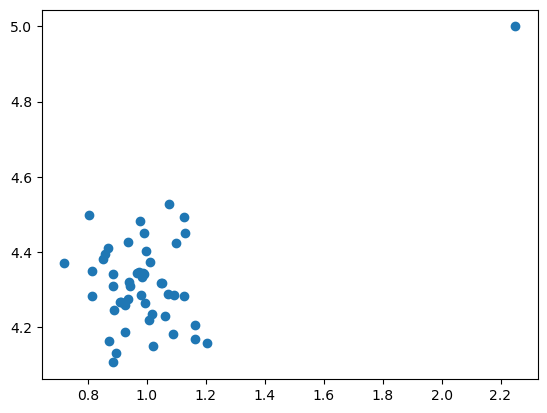

In [16]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

J'ai ici un petit dataset...Il y a certaines anomalies en haut à droite. 

Ce que je vais faire, c'est que je vais commencer par importer le modèle "Isolation Forest". Celui-ci se trouve dans "sklearn.ensemble" sous le nom "IsolationForest", comme vous pouvez le voir. 

In [17]:
from sklearn.ensemble import IsolationForest

Pour utiliser ce modèle "Isolation Forest", tout ce que vous avez à faire, c'est de préciser entre parenthèses le taux de contamination que vous désirez filtrer dans votre dataset. C'est aussi simple que ça. Vous n'avez pas besoin de définir le nombre d'estimations ou la taille maximale de vos arbres. On peut le faire, mais ce n'est pas nécessaire. 

Tout ce que vous avez à faire, c'est de préciser "contamination=0.01", ce qui représente 1 %. Ainsi, vous direz à votre modèle : "Je pense qu'il y a 1 % de données aberrantes dans notre dataset. Peux-tu les identifier pour moi, s'il te plaît?" 

In [18]:
model = IsolationForest(contamination=0.01)

Il faut l'entraîner, donc on va faire "modèle.fit(X)". 

In [19]:
model.fit(X)

IsolationForest(contamination=0.01)

Ensuite, "y = modèle.predict(X)" pour identifier d'autres anomalies. C'est aussi simple que ça.

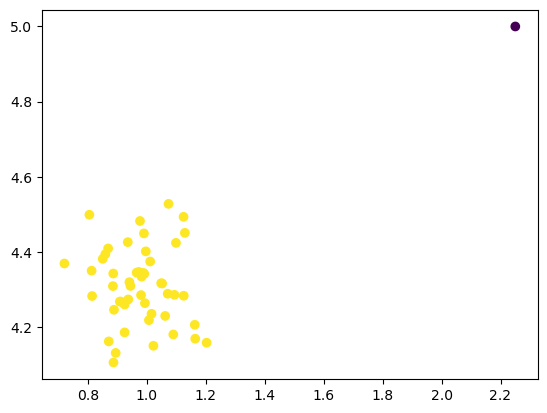

In [20]:
plt.scatter(X[:,0], X[:, 1], c=model.predict(X))

Maintenant, comme je vous le disais dans l'introduction, vous pouvez utiliser cette technique pour détecter tout type d'anomalie, que ce soit des fraudes bancaires, des défaillances techniques dans une usine, un comportement anormal sur une caméra de surveillance, ou tout simplement les outliers qui pourraient se trouver dans un dataset que vous désirez nettoyer. 

## 7. Application Isolation Forest (digits)

C'est ce que je vous propose de faire maintenant en identifiant, dans le dataset "digits", quels sont les chiffres les moins bien écrits qu'il est préférable d'éliminer avant de donner notre dataset à la machine pour une tâche de classification.
![Python_Seaborn_Fig_000209.png](./images/Python_Seaborn_Fig_000209.png)

In [21]:
from sklearn.datasets import load_digits

In [22]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

print(X.shape)

(1797, 64)


C'est un dataset qui contient 1797 échantillons, c'est-à-dire 1797 images de chiffres qui sont écrits. Ces chiffres vont de 0 à 9 et sont représentés sur des images de 64 pixels, qui sont des carrés. Si l'on souhaite observer une de ces images, on peut utiliser "plt.imshow()" sur l'une des images qui est enregistrée ici. 

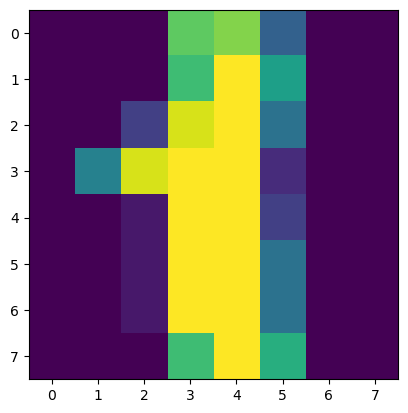

In [23]:
plt.imshow(images[1])

Pour prendre une image au hasard, on voit par exemple celle-ci, et c'est un "1". 

Ce que l'on pourrait essayer de faire, c'est de nettoyer ce dataset des images qui sont vraiment mal écrites. En effet, certaines personnes peuvent mal écrire les chiffres, et il se pourrait qu'il y en ait dans ce dataset. 

Ce que l'on pourrait donc faire, c'est d'entraîner un algorithme "Isolation Forest". 

On crée le modèle avec "IsolationForest", on fixe un "random_state" à zéro et on définit un taux de contamination, par exemple à 2%. 

Généralement, il est préférable de garder le taux de contamination assez faible, environ 1% à 2% et au grand maximum 5%, car si votre dataset est plus contaminé, cela serait assez étrange. 

In [24]:
model = IsolationForest(random_state=0, contamination=0.02)

Après avoir défini le modèle, on va l'entraîner sur nos données avec "modèle.fit(X)". 

In [25]:
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

Il ne reste plus qu'à voir les prédictions avec "modèle.predict(X)". 

In [26]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

Cela nous donne un tableau où, comme je le disais précédemment, nous avons principalement des "1" pour les données normales et des "-1" pour les anomalies. 

Dans notre tableau, on voit majoritairement des "1" car nous n'aurons que 2% de valeurs "-1". 

Si l'on souhaite filtrer et afficher ces anomalies, on utilisera le "boolean indexing" pour créer une variable "outliers" qui comprend toutes les prédictions égales à "-1". 

In [27]:
outliers = model.predict(X) == -1 
outliers

array([False, False, False, ..., False, False, False])

Avec ce tableau "outliers", on peut simplement filtrer "X", "y", ou "images". 

Si l'on prend la première image filtrée comme anomalie et que l'on souhaite l'afficher, on utilise "matplotlib" avec "plt.imshow()". 

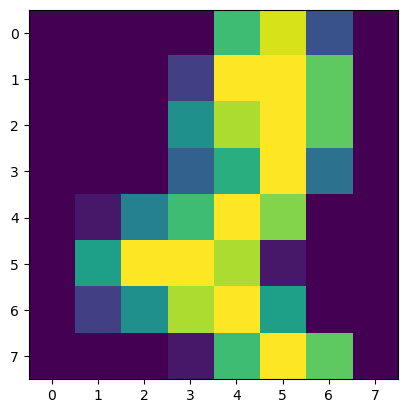

In [28]:
plt.imshow(images[outliers][0])

En visualisant cette anomalie, on réalise que notre algorithme a effectivement identifié un élément atypique dans notre dataset. 

Pour ajouter un titre à cette image, on peut utiliser "plt.title()".

Text(0.5, 1.0, '2')

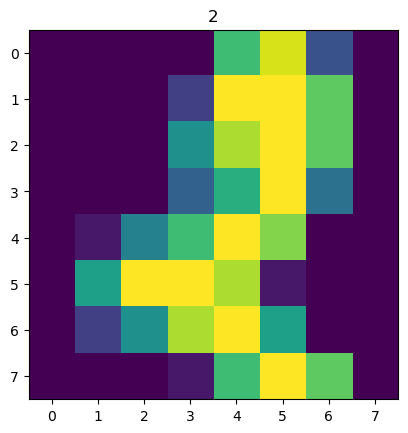

In [29]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])

En effet, c'est un 2.

Pour conclure sur la détection d'anomalies, nous avons examiné dans cette vidéo l'algorithme "Isolation Forest", qui est actuellement l'un des meilleurs dans sa catégorie. 

Son avantage est qu'il peut analyser des datasets de très grandes dimensions, c'est-à-dire avec de nombreuses variables. 

Toutefois, je vous suggère également de vous intéresser à l'algorithme "Local Outlier Factor". Cet algorithme s'appuie sur la méthode des k-plus proches voisins et permet de réaliser ce que l'on appelle de la "novelty detection". C'est-à-dire qu'il ne cherche pas à trouver des anomalies dans le dataset d'entraînement, mais plutôt dans le dataset de test, c'est-à-dire les données futures. C'est essentiellement ce qu'il faut savoir sur la détection d'anomalies.
![Python_Seaborn_Fig_000210.png](./images/Python_Seaborn_Fig_000210.png)

## 8. Réduction de dimension (PCA)

Je vais vous montrer comment visualiser en deux dimensions ce dataset "digits", qui en contient actuellement 64. 

Pour cela, nous allons explorer la troisième technique très populaire de l'apprentissage non supervisé : la réduction de la dimensionnalité.

La réduction de dimension est l'une des applications les plus importantes de l'apprentissage non supervisé. 

Le principe est de réduire la complexité superflue d'un dataset en projetant ses données dans un espace de plus petite dimension, c'est-à-dire un espace avec moins de variables. 

Le but est d'accélérer l'apprentissage de la machine et de lutter contre un phénomène appelé le "fléau de la dimension".
![Python_Seaborn_Fig_000211.png](./images/Python_Seaborn_Fig_000211.png)

Pour cela, l'un des algorithmes les plus populaires est l'analyse en composantes principales (PCA). Le principe est de projeter nos données sur les axes, les composantes principales, en cherchant à minimiser la distance entre nos points et leur projection.
![Python_Seaborn_Fig_000211.png](./images/Python_Seaborn_Fig_000212.png)

De cette manière, on réduit la dimension de notre dataset tout en préservant au maximum la variance de nos données. 
![Python_Seaborn_Fig_000211.png](./images/Python_Seaborn_Fig_000213.png)

Et c'est cela le plus important dans l'analyse en composantes principales : préserver un maximum de variance pour obtenir une projection qui soit la plus fidèle possible à nos données. 

Pour faire cela d'un point de vue mathématique, 
1. on calcule la matrice de covariance de nos variables, qui nous indique comment les données évoluent les unes par rapport aux autres, 
2. puis on détermine les vecteurs propres de cette matrice, c'est-à-dire les vecteurs qui facilitent l'interprétation de cette matrice. 

![Python_Seaborn_Fig_000211.png](./images/Python_Seaborn_Fig_000214.png)

Si vous ne connaissez pas ces termes, comme matrice de covariance ou vecteurs propres, ne vous inquiétez pas car tout est déjà implémenté dans Scikit-learn. 

Donc, pour faire de la réduction de dimension, il suffit 
1. de charger le transformeur "PCA" depuis le module des décompositions, 
2. de préciser le nombre de dimensions sur lesquelles vous désirez projeter vos données, et 
3. de transformer vos données avec la méthode "fit_transform". 

![Python_Seaborn_Fig_000211.png](./images/Python_Seaborn_Fig_000215.png)

Voilà, c'est aussi simple que cela.

Maintenant, la question est : comment choisir le nombre de composantes sur lesquelles projeter nos données? 
![Python_Seaborn_Fig_000211.png](./images/Python_Seaborn_Fig_000217.png)

Il y a deux cas possibles :

- Le premier cas est celui dans lequel vous cherchez à visualiser vos données dans un espace 2D ou 3D. Pour cela, c'est très simple : le nombre de composantes doit être égal à deux ou trois, selon votre choix.
![Python_Seaborn_Fig_000211.png](./images/Python_Seaborn_Fig_000216.png)

- L'autre cas de figure est celui dans lequel vous cherchez à compresser vos données pour accélérer l'apprentissage de la machine sur des tâches de classification ou de régression. Pour cela, il faut choisir le nombre de composantes de manière à préserver entre 95 et 99 % de la variance de vos données. 
![Python_Seaborn_Fig_000211.png](./images/Python_Seaborn_Fig_000218.png)


En effet, plus on réduit la dimension d'un dataset, plus on perd en qualité, c'est-à-dire en variance, ce qui est logique. Notre but est donc de réduire au maximum la dimension d'un dataset tout en minimisant la perte de qualité. 
![Python_Seaborn_Fig_000211.png](./images/Python_Seaborn_Fig_000219.png)

C'est pourquoi il est conseillé de choisir le nombre de composantes de manière à conserver entre 95 à 99 % de la variance originelle de nos données.

## 9. Visualisation de données

Le dataset contient 64 variables.
![Python_Seaborn_Fig_000220.png](./images/Python_Seaborn_Fig_000220.png)

In [30]:
from sklearn.decomposition import PCA

In [31]:
X.shape

(1797, 64)

Nous allons chercher à projeter ces 64 variables dans un espace 2D afin de visualiser cet espace dans un graphique et pour cela, nous allons créer un modèle dans lequel le nombre de composantes sera égal à 2. 

In [32]:
model = PCA(n_components=2)

Ensuite, nous entraînerons notre modèle et l'utiliserons pour transformer les données X. Ainsi, nous utiliserons la méthode "fit_transform", qui nous donnera un tableau dont les dimensions seront de 1797 lignes et deux colonnes. 

In [33]:
model.fit_transform(X)

array([[ -1.25946496,  21.2748866 ],
       [  7.95761355, -20.76869914],
       [  6.99192069,  -9.95598875],
       ...,
       [ 10.80128446,  -6.96024818],
       [ -4.87210299,  12.42394399],
       [ -0.34439131,   6.36555157]])

Une fois ce tableau obtenu, il ne reste plus qu'à l'enregistrer dans une variable, par exemple "x_reduced", et d'utiliser la fonction "scatter" de Matplotlib pour observer les deux composantes de X. Donc, nous écrirons "X_reduced[1,0]" pour la première composante et la même chose pour la deuxième composante. 

En observant le résultat, nous ajouterons des couleurs sur notre graphique en écrivant "c=y", car je rappelle que "y" contient les étiquettes de nos différents échantillons (la valeur 1, la valeur 0, la valeur 2, etc.). 

Pour donner du sens à tout cela, nous ajouterons une colorbar.

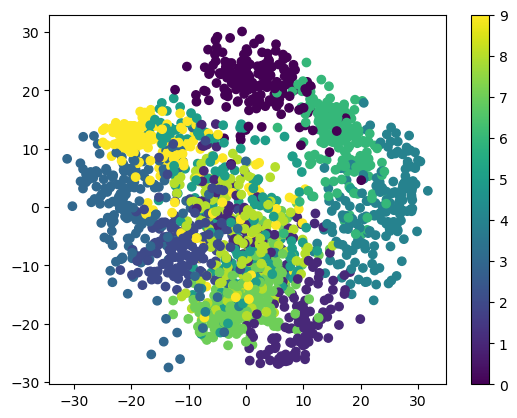

In [34]:
X_reduced = model.fit_transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.colorbar()

Ainsi, nous pouvons observer comment sont organisés dans un espace 2D les échantillons du dataset. 

Par exemple, nous retrouvons les chiffres 0 en haut, le chiffre 1 plus bas. Cela est cohérent car le 0 a une forme circulaire tandis que le 1 est une barre, ils ne sont donc pas proches l'un de l'autre.De la même manière, nous retrouverons le 9 proche du 0, le 7, le 6, le 5, etc. C'est un graphique très intéressant à analyser. 

Pour comprendre à quoi correspondent les axes de ce graphique, il est nécessaire d'analyser le contenu de chaque composante. 

In [35]:
model.components_

array([[ 1.11022302e-16, -1.73094608e-02, -2.23428827e-01,
        -1.35913298e-01, -3.30322884e-02, -9.66341203e-02,
        -8.32946562e-03,  2.26899810e-03, -3.20516184e-04,
        -1.19308874e-01, -2.44451671e-01,  1.48512742e-01,
        -4.67318644e-02, -2.17740736e-01, -1.48136975e-02,
         4.47779489e-03, -4.94133911e-05, -7.95419034e-02,
         8.33951116e-02,  2.15915316e-01, -1.72126817e-01,
        -1.63712080e-01,  2.86444665e-02,  4.23251992e-03,
         9.85489384e-05,  6.42319204e-02,  2.54093317e-01,
        -3.56771136e-02, -2.09462668e-01, -4.31311324e-02,
         5.13119083e-02,  2.13422781e-04,  0.00000000e+00,
         1.59950866e-01,  3.68690789e-01,  1.64406919e-01,
         8.52007752e-02,  3.72982531e-02,  2.15867013e-02,
         0.00000000e+00,  1.28865551e-03,  1.06945245e-01,
         3.03067400e-01,  2.47813084e-01,  2.09637288e-01,
         1.22325382e-02, -3.69458539e-02,  1.61484958e-03,
         6.93023195e-04, -8.35146270e-03, -5.58599722e-0

Ainsi, nous avons le contenu de la composante numéro 1 et le contenu de la composante numéro 2. 

Si nous analysons ces dimensions, nous verrons que chaque composante contient 64 valeurs.

In [36]:
model.components_.shape

(2, 64)

Ces 64 valeurs existent car chaque composante est une combinaison linéaire des 64 variables de notre dataset. 

Par exemple, sur le graphique initial, l'axe orange pourrait représenter une combinaison linéaire de x1 et x2. 
![Python_Seaborn_Fig_000221.png](./images/Python_Seaborn_Fig_000221.png)


Ici, c'est le même principe mais appliqué sur 64 dimensions. En examinant en détail les différentes valeurs présentes dans chaque composante, nous sommes en mesure de comprendre à quoi elles correspondent.


## 10. Compression de données

À présent, voyons comment utiliser l'analyse en composantes principales pour compresser un dataset dans le but d'accélérer l'apprentissage de la machine. 

Comme nous l'avons vu, le but est de préserver entre 95 et 99 % de la variance de nos données. 
![Python_Seaborn_Fig_000222.png](./images/Python_Seaborn_Fig_000222.png)

Pour cela, nous commencerons par entraîner notre modèle "PCA" sur le même nombre de dimensions que l'on a dans X, c'est-à-dire 64. 

In [37]:
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

PCA(n_components=64)

Ensuite, nous examinerons quel est le pourcentage de variance préservé par chacune de nos composantes. Pour cela, on écrit "explained_variance_ratio" qui nous donne le pourcentage de variance préservée par chacune des composantes, comme la composante 1, la composante 2, la composante 3, etc.

In [38]:
model.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

Ce que nous allons faire, c'est sommer cumulativement toutes ces variances, tous ces pourcentages,

In [39]:
np.cumsum(model.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

et observer que l'on passe de 0,14 % à 100 %. 

Nous chercherons le moment où nous atteignons 95% ou 99%, selon le compromis que vous recherchez entre la réduction maximale du dataset et la conservation d'un maximum d'informations. 

Nous pourrons visualiser tout cela dans un graphique matplotlib. En utilisant plt.plot, on peut voir qu'à partir d'environ 40 à 45 composantes, nous atteignons les 99 %. 

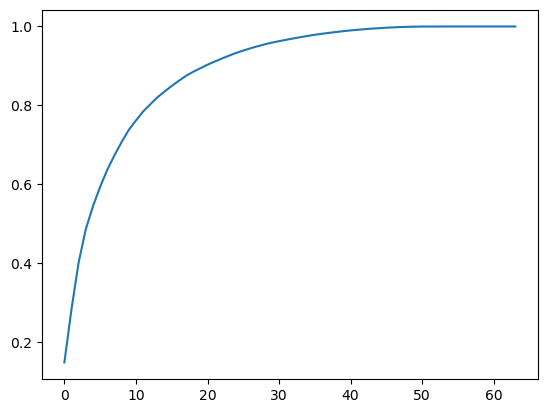

In [40]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

Une autre méthode serait d'utiliser la fonction numpy.argmax pour trouver l'indice où cela dépasse, par exemple, 99 %. C'est à partir de la 40e composante principale que l'on atteint 99 % de la variance de notre modèle. 

In [41]:
np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.99)

40

À partir de là, il ne reste plus qu'à réentraîner notre modèle PCA avec les 40 composantes trouvées. Ainsi, nous aurons réduit notre dimension tout en conservant 99% de l'information de notre dataset.

In [42]:
model = PCA(n_components=40)
X_reduced = model.fit_transform(X)

Pour observer à quoi ressemblent ces images une fois compressées, il faut commencer par les décompresser pour qu'elles retrouvent leurs 64 pixels. Pour cela, on utilisera la méthode "inverse_transform" de notre modèle sur X_reduced. 

En faisant cela, nos données ne retrouvent pas exactement leur position d'origine, 
![Python_Seaborn_Fig_000223.png](./images/Python_Seaborn_Fig_000224.png)

mais les axes (c'est-à-dire les composantes principales) sont repositionnés là où ils ont été calculés dans notre dataset. 
![Python_Seaborn_Fig_000223.png](./images/Python_Seaborn_Fig_000225.png)

In [43]:
X_recovered = model.inverse_transform(X_reduced)
X_recovered

array([[-3.56012705e-16, -9.70879829e-03,  5.51713622e+00, ...,
        -2.81122683e-01, -6.07535545e-01,  5.03980323e-01],
       [ 3.39557572e-16, -1.52471269e-01,  3.62232317e-01, ...,
         1.04230693e+01,  6.97579211e-02, -5.62596646e-01],
       [-3.23742039e-15,  1.70626085e-01, -4.22507950e-03, ...,
         1.56136041e+01,  8.48573400e+00,  1.21267330e+00],
       ...,
       [ 2.48915763e-15, -2.97750584e-01,  1.43598692e+00, ...,
         5.93976182e+00, -1.88456427e-01, -2.76699481e-01],
       [-1.70475884e-15, -1.21517003e-01,  4.12289654e+00, ...,
         1.19218275e+01,  5.19127923e-01,  1.26506054e-01],
       [-1.76233251e-15,  4.38546431e-01,  9.38225220e+00, ...,
         1.20490033e+01,  1.21760044e+00, -7.37754542e-01]])

En suivant cette procédure et en créant une variable X_recovered, pour afficher une des images de X_recovered (par exemple la première), il suffit d'utiliser "imshow" et de redimensionner cette image pour qu'elle mesure 8 pixels de hauteur et 8 pixels de largeur. 

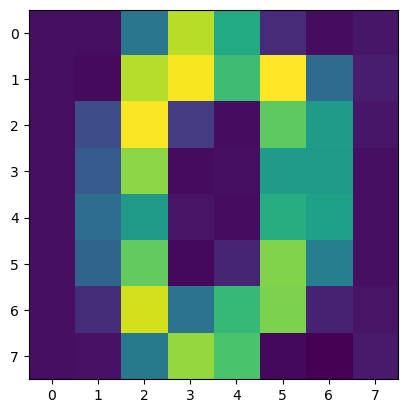

In [44]:
plt.imshow(X_recovered[0].reshape((8,8)))

Le résultat montre que la compression PCA en 40 dimensions a préservé une grande partie de la qualité de notre image. Les seuls éléments qui ont perdu en qualité sont ceux de l'arrière-plan, mais pour reconnaître un chiffre, ce n'est pas l'arrière-plan qui compte, c'est la zone centrale.

Il serait intéressant de voir comment la qualité peut être affectée en changeant le nombre de composantes principales. 

Si nous n'utilisons qu'une seule composante, l'image sera mal compressée car tout sera projeté sur cette seule dimension. 

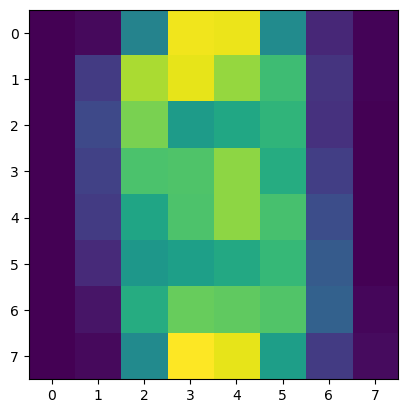

In [45]:
model = PCA(n_components=1)
X_reduced = model.fit_transform(X)

X_recovered = model.inverse_transform(X_reduced)
X_recovered

plt.imshow(X_recovered[0].reshape((8,8)))

En utilisant deux dimensions, c'est un peu mieux, 

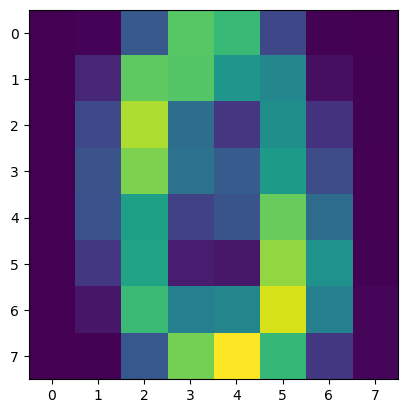

In [46]:
model = PCA(n_components=2)
X_reduced = model.fit_transform(X)

X_recovered = model.inverse_transform(X_reduced)
X_recovered

plt.imshow(X_recovered[0].reshape((8,8)))

et avec trois dimensions, c'est encore mieux. 

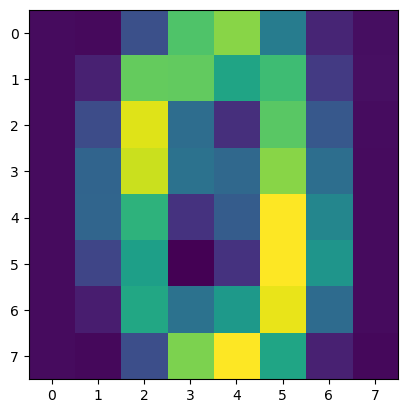

In [47]:
model = PCA(n_components=3)
X_reduced = model.fit_transform(X)

X_recovered = model.inverse_transform(X_reduced)
X_recovered

plt.imshow(X_recovered[0].reshape((8,8)))

Plus nous ajoutons de dimensions, plus le pourcentage de variance préservée augmente. C'est ce que nous avions observé sur le graphique précédent.
![Python_Seaborn_Fig_000226.png](./images/Python_Seaborn_Fig_000226.png)

Une autre technique serait d'écrire directement dans "n_components" le pourcentage de variance désiré. Si nous écrivons 0,95, alors 95 % de la variance sera préservée. 

Pour connaître le nombre de composantes utilisées dans notre modèle, il suffit d'écrire "model.n_components" et nous verrons qu'il y a 29 composantes nécessaires pour atteindre 95 % de la variance.

Pour conclure sur cet algorithme, quelques informations essentielles à connaître pour bien l'utiliser :

- Il faut toujours standardiser vos données avant de les utiliser avec PCA. Les axes des composantes principales partent tous de l'origine, donc il est crucial que vos données soient centrées et aient une variance égale à 1.
- L'algorithme PCA est conçu pour traiter des variables continues. Beaucoup essaient de l'utiliser pour projeter des variables encodées en one-hot dans des espaces de dimensions réduites. Cela peut fonctionner, mais ce n'est pas l'usage premier de PCA.
![Python_Seaborn_Fig_000226.png](./images/Python_Seaborn_Fig_000227.png)

- L'analyse en composantes principales ne permet pas de projeter efficacement des données ayant des relations non linéaires. Dans de tels cas, on préférera utiliser des techniques de "manifold learning" ou T-SNE.
![Python_Seaborn_Fig_000226.png](./images/Python_Seaborn_Fig_000228.png)

En résumé, en sklearn :

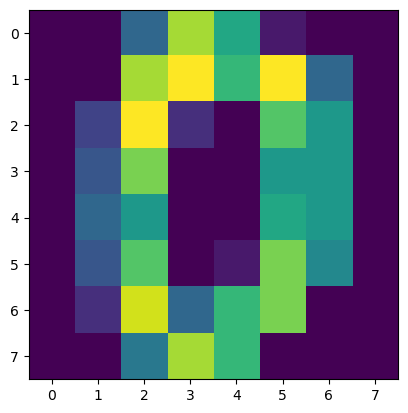

In [48]:
## Application : Digits Outliers
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

plt.imshow(images[0])

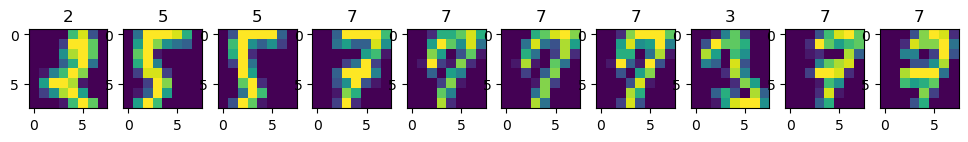

In [49]:
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(X)
outliers = model.predict(X) == -1 

plt.figure(figsize=(12, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

In [50]:
## Visualisation 2D
model = PCA(n_components=2)
model.fit(X)

PCA(n_components=2)

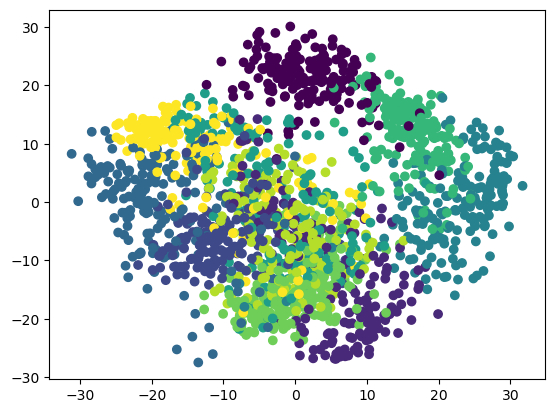

In [51]:
x_pca = model.transform(X)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

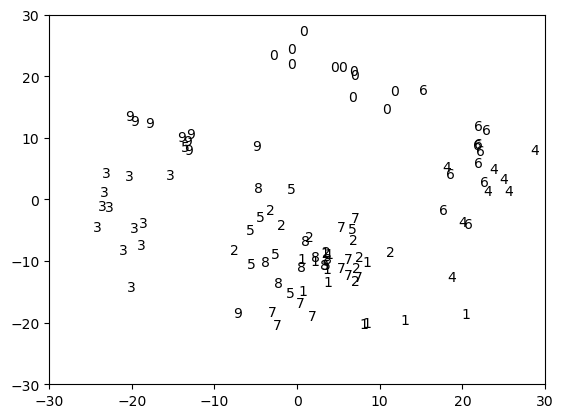

In [52]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100):
    plt.text(x_pca[i,0], x_pca[i,1], str(y[i]))

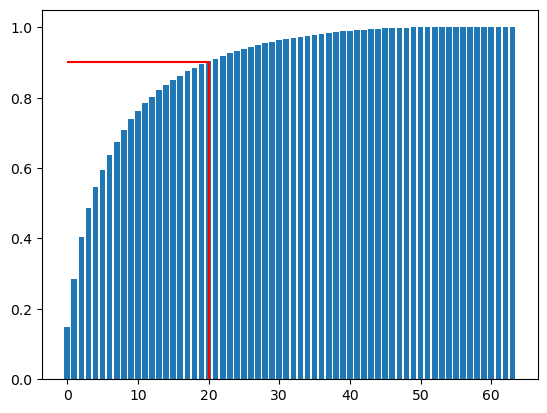

In [53]:
## Compression de données
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)


plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')

In [54]:
model = PCA(n_components=0.99)
model.fit(X)

PCA(n_components=0.99)

Text(0.5, 1.0, 'Compressé')

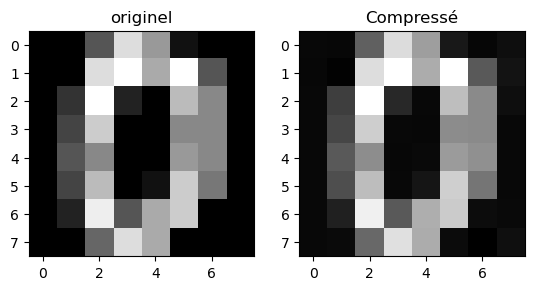

In [55]:
X_compress = model.fit_transform(X)
X_decompress = model.inverse_transform(X_compress)

plt.subplot(1, 2, 1)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')
plt.title('originel')
plt.subplot(1, 2, 2)
plt.imshow(X_decompress[0,:].reshape((8,8)), cmap='gray')
plt.title('Compressé')

## 11. Infographie
![Python_Seaborn_Fig_000229.png](./images/Python_Seaborn_Fig_000229.png)